In [1]:
# Imports
import numpy as np 
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix

In [2]:
G= karate_club_graph()
order = sorted(list(G.nodes()))

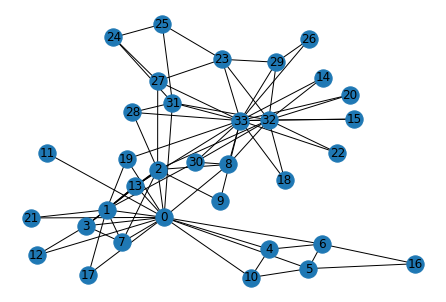

In [4]:
nx.draw(G, with_labels=True)

In [6]:
G.number_of_edges()

78

In [ ]:
A = nx.to_numpy_matrix(G, nodelist=order)

In [ ]:
A

In [ ]:
I = np.eye(G.number_of_nodes())

In [ ]:
I

In [ ]:
A_own = A + I
A_own

In [ ]:
D_own = np.array(np.sum(A_own, axis=0))[0]
D_own

In [ ]:
D_inv=D_own**-0.5
D_inv

In [ ]:
D_inv = np.matrix(np.diag(D_inv))
D_inv

In [ ]:
D_inv.shape

In [ ]:
W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W1

In [ ]:
W1.shape[1]

In [ ]:
W2 = np.random.normal(loc=0, size=(W1.shape[1], 2))
W2

In [ ]:
def gcn_layer(A, D, X, W):
    feature=D * A * D * X * W
    feature=np.maximum(0,feature)
    return feature

In [ ]:
H1 = gcn_layer(A_own, D_inv, I, W1)

In [ ]:
H1

In [ ]:
H2 = gcn_layer(A_own, D_inv, H1, W2)
H2

In [ ]:
output=H2

In [ ]:
feature_representations = {
    node: np.array(output)[node] 
    for node in G.nodes()}

In [ ]:
feature_representations